<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/disinfectant_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import library
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
import seaborn as sns

In [28]:
import pandas as pd
df = pd.read_csv('./EXP0-7J.csv')
df.head()

,Time,Reading_ID,Temp,Humidity,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,TARGET
0,12:43:55,2,34.4,45.0,441,274,826,374,830,373,272,441,0
1,12:44:0,3,34.4,44.9,468,285,1024,385,1024,382,283,468,0
2,12:44:5,4,34.3,45.4,536,296,1024,448,1024,446,294,537,0
3,12:44:10,5,34.3,46.1,567,280,1024,469,1024,465,278,567,0
4,12:44:16,6,34.2,46.2,577,264,1024,475,1024,474,260,577,0


In [29]:
labels = pd.read_excel('./dataset description.xlsx')
labels = labels['NAME'].values
labels,labels.shape

(array(['FRESH AIR', 'RAINBOW', 'PATANJALI GONYLE', 'LIZOL',
        'PURIC INSTA SAFE', 'PHENYLE NURSE', 'MOPZ NATURE FRESH',
        'MOPZ LIME FRESH'], dtype=object),
 (8,))

In [30]:
df.head()

,Time,Reading_ID,Temp,Humidity,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,TARGET
0,12:43:55,2,34.4,45.0,441,274,826,374,830,373,272,441,0
1,12:44:0,3,34.4,44.9,468,285,1024,385,1024,382,283,468,0
2,12:44:5,4,34.3,45.4,536,296,1024,448,1024,446,294,537,0
3,12:44:10,5,34.3,46.1,567,280,1024,469,1024,465,278,567,0
4,12:44:16,6,34.2,46.2,577,264,1024,475,1024,474,260,577,0


In [31]:
df.drop(['Time','Reading_ID'],inplace=True,axis=1)
columns = df.columns
columns

Index(['Temp', 'Humidity', 'MQ2', 'MQ3', 'MQ4', 'MQ7', 'MQ9', 'MQ135', 'MQ6',
       'MQ8', 'TARGET'],
      dtype='object')

In [32]:
# df = df.values
df_y = df['TARGET']
df_y
df_x = df.drop(['TARGET'],axis=1)
df_x
# df.drop(['TARGET'],inplace=True,axis=1)

,Temp,Humidity,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8
0,34.4,45.0,441,274,826,374,830,373,272,441
1,34.4,44.9,468,285,1024,385,1024,382,283,468
2,34.3,45.4,536,296,1024,448,1024,446,294,537
3,34.3,46.1,567,280,1024,469,1024,465,278,567
4,34.2,46.2,577,264,1024,475,1024,474,260,577
...,...,...,...,...,...,...,...,...,...,...
4394,26.0,61.1,148,72,256,101,257,100,72,148
4395,26.1,61.1,164,72,257,101,258,101,72,163
4396,26.1,61.1,163,73,260,101,261,101,72,163
4397,26.1,61.1,151,72,260,101,261,101,72,151


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_ohe  = ohe.fit_transform(df[['TARGET']]).toarray()
y_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [34]:
x_data = df_x.values
y_data = df_y.values
y_data_ohe = y_ohe
x_data,y_data,x_data.shape,y_data_ohe,y_data.shape

(array([[ 34.4,  45. , 441. , ..., 373. , 272. , 441. ],
        [ 34.4,  44.9, 468. , ..., 382. , 283. , 468. ],
        [ 34.3,  45.4, 536. , ..., 446. , 294. , 537. ],
        ...,
        [ 26.1,  61.1, 163. , ..., 101. ,  72. , 163. ],
        [ 26.1,  61.1, 151. , ..., 101. ,  72. , 151. ],
        [ 26.1,  61.1, 139. , ..., 101. ,  72. , 138. ]]),
 array([0, 0, 0, ..., 7, 7, 7]),
 (4399, 10),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]]),
 (4399,))

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data_ohe, test_size=0.33, random_state=42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [48]:
def scaler(arr):
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  arr_ = sc.fit_transform(arr)
  # x_test = sc.fit_transform(x_test)
  return arr_

def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y
# x_train/ = to_supervised(x_train)
x_train.shape[0]


X = []
for i in range(x_train.shape[0]):
  arr = x_train[i]
  arr = np.array(arr)
  arr = np.reshape(arr,(5,2))
  X.append(arr)
X[0:5]
  

X = np.array(X)
X.shape

(2947, 5, 2)

In [52]:
import tensorflow as tf
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(50))
model_cnn.add(tf.keras.layers.Dense(units=8,activation='softmax'))
model_cnn.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam',metrics=['accuracy'])

In [53]:
history = model_cnn.fit(X, y_train,  epochs=100, batch_size = 64, verbose=1)

Epoch 1/100
47/47 [==============================] - 1s 1ms/step - loss: 1.5161 - accuracy: 0.5110
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.9356 - accuracy: 0.7377
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.7737
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.8249
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8748
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.9125
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2843 - accuracy: 0.9209
Epoch 8/100
47/47 [==============================] - 0s 1ms/step - loss: 0.2433 - accuracy: 0.9518
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.2222 - accuracy: 0.9494
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1993 - accuracy: 0.9535
Epoch 11/

In [54]:
from keras.models import load_model
model_cnn.save('AirPollutionCNN.h5')

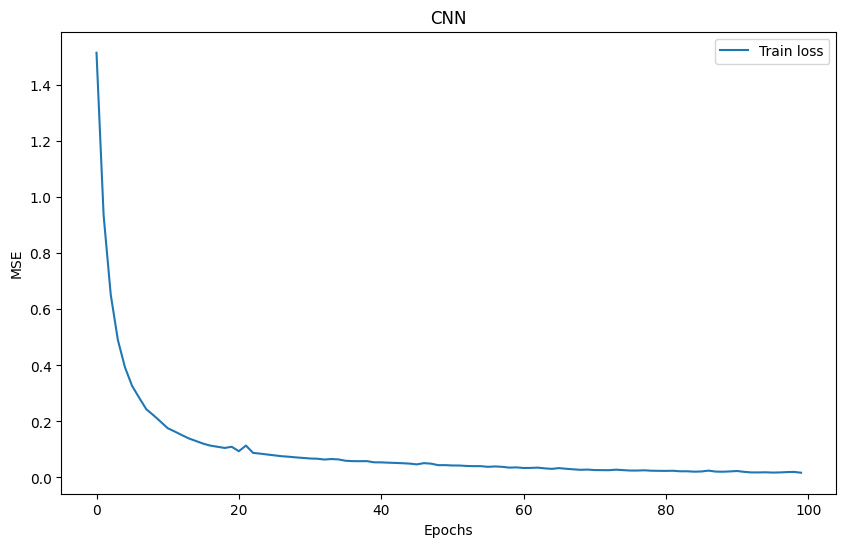

<Figure size 640x480 with 0 Axes>

In [56]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("CNN")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph_CNN.png')

In [67]:
X_test = []
for i in range(x_test.shape[0]):
  arr = x_test[i]
  arr = np.array(arr)
  arr = np.reshape(arr,(5,2))
  X_test.append(arr)
# X[0:5]


X_test = np.array(X_test)
y_pred = model_cnn.predict(X_test)
X_test.shape


y_pred = [np.argmax(i) for i in y_pred]
y_test = [np.argmax(i) for i in y_test]

46/46 [==============================] - 0s 993us/step


Text(95.72222222222221, 0.5, 'Truth')

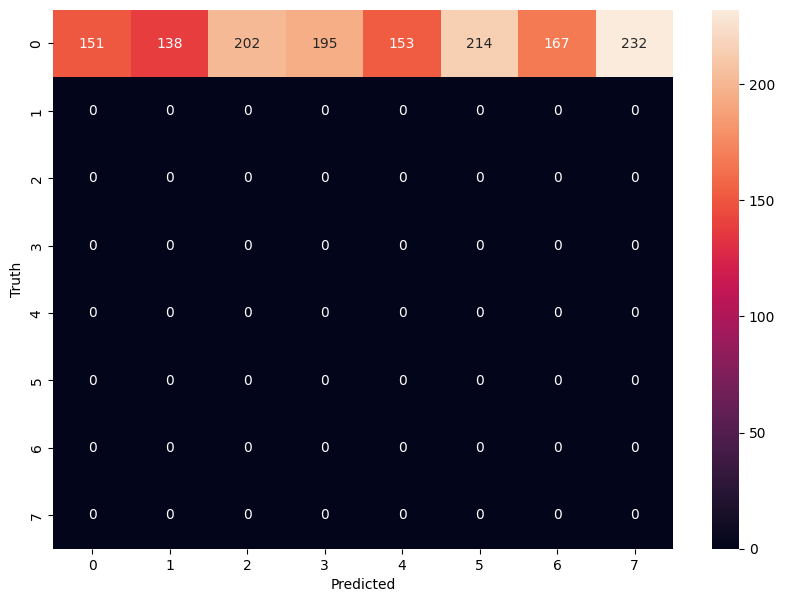

In [68]:
# confusion matrix
import matplotlib.pyplot as plt

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')